In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

data = pd.read_csv("국민건강보험공단_건강검진정보_20211231.csv")

data

,HCHK_YEAR,IDV_ID,SIDO,SEX,AGE_GROUP,HEIGHT,WEIGHT,WAIST,SIGHT_LEFT,SIGHT_RIGHT,...,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,HCHK_OE_INSPEC_YN,CRS_YN,TTH_MSS_YN,ODT_TRB_YN,WSDM_DIS_YN,TTR_YN,DATA_STD_DT
0,2021,2551207,41,2,12,160,60,79.0,0.0,0.0,...,23.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,2022-08-11
1,2021,4030716,41,2,11,160,60,74.0,0.0,0.0,...,12.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,2022-08-11
2,2021,3297511,41,2,9,150,60,72.0,0.0,0.0,...,70.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,2022-08-11
3,2021,1638533,41,2,16,150,60,86.0,0.0,0.0,...,24.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,2022-08-11
4,2021,456602,41,2,13,155,60,66.0,0.0,0.0,...,12.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,2022-08-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2021,4447892,11,2,14,150,60,91.0,0.0,0.0,...,32.0,1.0,0.0,1,0.0,NaN,NaN,NaN,0.0,2022-08-11
999996,2021,2763417,47,1,9,170,100,99.0,1.0,1.0,...,73.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,2022-08-11
999997,2021,572436,47,2,10,150,75,98.0,0.0,0.0,...,70.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,2022-08-11
999998,2021,541281,11,2,10,160,55,70.0,0.0,0.0,...,140.0,1.0,0.0,1,0.0,NaN,NaN,NaN,0.0,2022-08-11


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   HCHK_YEAR          1000000 non-null  int64  
 1   IDV_ID             1000000 non-null  int64  
 2   SIDO               1000000 non-null  int64  
 3   SEX                1000000 non-null  int64  
 4   AGE_GROUP          1000000 non-null  int64  
 5   HEIGHT             1000000 non-null  int64  
 6   WEIGHT             1000000 non-null  int64  
 7   WAIST              999917 non-null   float64
 8   SIGHT_LEFT         999789 non-null   float64
 9   SIGHT_RIGHT        999790 non-null   float64
 10  HEAR_LEFT          999810 non-null   float64
 11  HEAR_RIGHT         999811 non-null   float64
 12  BP_HIGH            992655 non-null   float64
 13  BP_LWST            992655 non-null   float64
 14  BLDS               992588 non-null   float64
 15  TOT_CHOLE          425059 non-nul

In [13]:
missing_values = data.isnull().sum()

print("각 컬럼별 결측치 개수:")
print(missing_values)

각 컬럼별 결측치 개수:
HCHK_YEAR                  0
IDV_ID                     0
SIDO                       0
SEX                        0
AGE_GROUP                  0
HEIGHT                     0
WEIGHT                     0
WAIST                     83
SIGHT_LEFT               211
SIGHT_RIGHT              210
HEAR_LEFT                190
HEAR_RIGHT               189
BP_HIGH                 7345
BP_LWST                 7345
BLDS                    7412
TOT_CHOLE             574941
TRIGLYCERIDE          574945
HDL_CHOLE             574945
LDL_CHOLE             582568
HMG                     7414
OLIG_PROTE_CD          12561
CREATININE              7407
SGOT_AST                7405
SGPT_ALT                7405
GAMMA_GTP               7406
SMK_STAT_TYPE_CD         370
DRK_YN                   168
HCHK_OE_INSPEC_YN          0
CRS_YN                683234
TTH_MSS_YN           1000000
ODT_TRB_YN           1000000
WSDM_DIS_YN          1000000
TTR_YN                683233
DATA_STD_DT                0


# 고혈압 : 수축기,이완기 혈압

<Axes: xlabel='SMK_STAT_TYPE_CD', ylabel='BP_HIGH'>

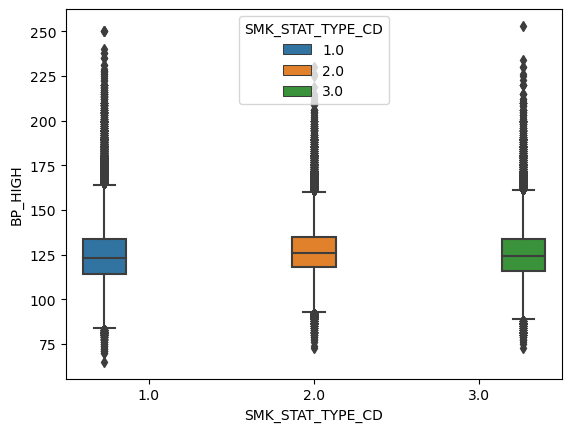

In [18]:
tension = ["BP_HIGH","BP_LWST","SMK_STAT_TYPE_CD"]
tensino_df = data[tension]
tensino_df

sns.boxplot(tensino_df,x="SMK_STAT_TYPE_CD",y="BP_HIGH",hue="SMK_STAT_TYPE_CD")

In [29]:
# 'SMK_STAT_TYPE_CD' 열의 값이 3인 경우를 2로 변경
t_df = tensino_df.copy()
t_df['SMK_STAT_TYPE_CD'] = t_df['SMK_STAT_TYPE_CD'].replace(3.0, 2.0)

print(t_df.head())
print(t_df[t_df['SMK_STAT_TYPE_CD'] == 3.0])


   BP_HIGH  BP_LWST  SMK_STAT_TYPE_CD
0    101.0     60.0               1.0
1    121.0     75.0               1.0
2    135.0     82.0               1.0
3    130.0     77.0               1.0
4    120.0     80.0               1.0
Empty DataFrame
Columns: [BP_HIGH, BP_LWST, SMK_STAT_TYPE_CD]
Index: []


In [55]:
print(t_df[t_df['SMK_STAT_TYPE_CD'] == 2]['BP_HIGH'].count())
print(t_df[t_df['SMK_STAT_TYPE_CD'] == 1]['BP_HIGH'].count())
print(t_df[t_df['SMK_STAT_TYPE_CD'] == 2]['BP_LWST'].count())
print(t_df[t_df['SMK_STAT_TYPE_CD'] == 1]['BP_LWST'].count())


363540
628747
363539
628748


In [53]:
from scipy.stats import ttest_ind, shapiro, levene

# 담배를 피우는 그룹과 피우지 않는 그룹의 수축기 혈압 비교 (샘플 크기를 1000개로 제한)
smoking_group = t_df[t_df['SMK_STAT_TYPE_CD'] == 2]['BP_HIGH'].dropna().sample(n=20000, random_state=42)
non_smoking_group = t_df[t_df['SMK_STAT_TYPE_CD'] == 1]['BP_HIGH'].dropna().sample(n=20000, random_state=42)

# 등분산성 검정
levene_statistic, levene_p_value = levene(smoking_group, non_smoking_group)
print(f"Levene's Test - Statistic: {levene_statistic}, p-value: {levene_p_value}")

# 정규성 검정
shapiro_statistic_smoking, shapiro_p_value_smoking = shapiro(smoking_group)
shapiro_statistic_non_smoking, shapiro_p_value_non_smoking = shapiro(non_smoking_group)

print(f"Shapiro-Wilk Test - Smoking Group - Statistic: {shapiro_statistic_smoking}, p-value: {shapiro_p_value_smoking}")
print(f"Shapiro-Wilk Test - Non-Smoking Group - Statistic: {shapiro_statistic_non_smoking}, p-value: {shapiro_p_value_non_smoking}")




Levene's Test - Statistic: 61.018354485657134, p-value: 5.791892438253105e-15
Shapiro-Wilk Test - Smoking Group - Statistic: 0.982367753982544, p-value: 1.639519203260036e-43
Shapiro-Wilk Test - Non-Smoking Group - Statistic: 0.9861816167831421, p-value: 1.2946582498912342e-39


In [54]:
from scipy.stats import ranksums

# 랭크-섬(Rank Sum) 검정 수행
statistic, p_value = ranksums(smoking_group, non_smoking_group)

# 결과 출력
print(f"Rank Sum Statistic: {statistic}")
print(f"P-value: {p_value}")


Rank Sum Statistic: 11.807678370917966
P-value: 3.562630270391076e-32


In [56]:
from scipy.stats import ttest_ind, shapiro, levene

# 담배를 피우는 그룹과 피우지 않는 그룹의 수축기 혈압 비교 (샘플 크기를 1000개로 제한)
smoking_group = t_df[t_df['SMK_STAT_TYPE_CD'] == 2]['BP_LWST'].dropna().sample(n=20000, random_state=42)
non_smoking_group = t_df[t_df['SMK_STAT_TYPE_CD'] == 1]['BP_LWST'].dropna().sample(n=20000, random_state=42)

# 등분산성 검정
levene_statistic, levene_p_value = levene(smoking_group, non_smoking_group)
print(f"Levene's Test - Statistic: {levene_statistic}, p-value: {levene_p_value}")

# 정규성 검정
shapiro_statistic_smoking, shapiro_p_value_smoking = shapiro(smoking_group)
shapiro_statistic_non_smoking, shapiro_p_value_non_smoking = shapiro(non_smoking_group)

print(f"Shapiro-Wilk Test - Smoking Group - Statistic: {shapiro_statistic_smoking}, p-value: {shapiro_p_value_smoking}")
print(f"Shapiro-Wilk Test - Non-Smoking Group - Statistic: {shapiro_statistic_non_smoking}, p-value: {shapiro_p_value_non_smoking}")




Levene's Test - Statistic: 2.1848463806063676, p-value: 0.13938284374968726
Shapiro-Wilk Test - Smoking Group - Statistic: 0.9850450754165649, p-value: 7.390307971002653e-41
Shapiro-Wilk Test - Non-Smoking Group - Statistic: 0.9904259443283081, p-value: 4.194388381522028e-34


In [57]:
from scipy.stats import ranksums

# 랭크-섬(Rank Sum) 검정 수행
statistic, p_value = ranksums(smoking_group, non_smoking_group)

# 결과 출력
print(f"Rank Sum Statistic: {statistic}")
print(f"P-value: {p_value}")


Rank Sum Statistic: 23.652936145455442
P-value: 1.100994830310155e-123
